In [57]:
'''
Data Engineering
'''

'''
D1. Import Libraries for Data Engineering
'''
import numpy as np

import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [2]:
'''
D2. Load CIFAR10 data
'''
train_dataset = datasets.CIFAR10(root='./data', 
                             download=True,
                             train=True,
                             transform=transforms.ToTensor())

test_dataset = datasets.CIFAR10(root='./data', 
                            download=True,
                            train=False,
                             transform=transforms.ToTensor())

100%|████████████████████████| 170498071/170498071 [00:17<00:00, 9725614.40it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
'''
Model Engineering
'''

'''
M1. Import Libraries for Model Engineering
'''

import torch.nn as nn
import torch.optim as optimizers

np.random.seed(123)
torch.manual_seed(123)

In [383]:
'''
M2. Set Hyperparameters
'''
hidden_size = 256 
output_dim = 10 # output layer dimensionality = num_classes
EPOCHS = 30
batch_size = 256
learning_rate = 0.001

In [384]:
'''
M3. DataLoader
'''

train_ds = torch.utils.data.DataLoader(dataset=train_dataset,
                                       batch_size=batch_size, 
                                       shuffle=True)
test_ds = torch.utils.data.DataLoader(dataset=test_dataset,
                                      batch_size=batch_size, 
                                      shuffle=False)

In [473]:
'''
M4. Build NN model
'''
# 3-Layers Convolution neural network with one hidden layer
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()

        # Convolution 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=0, bias=False)
        self.relu1 = nn.ReLU()

        # Max pool 1
        self.maxpool2d1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=0, bias=False)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2d2 = nn.MaxPool2d(kernel_size=2)

        # Convolution 3
        self.conv3 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=0, bias=False)
        self.relu3 = nn.ReLU()

        # Max pool 3
        self.maxpool2d3 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.d1 = nn.Linear(3 * 2 * 2, output_dim, bias=False) 
#         self.d2 = nn.Dropout(0.2)
#         self.d3 = nn.Linear(16, output_dim) 

    def forward(self, x):
        # Convolution 1
        x = self.conv1(x)
        x = self.relu1(x)

        # Max pool 1
        x = self.maxpool2d1(x)

        # Convolution 2 
        x = self.conv2(x)
        x = self.relu2(x)

        # Max pool 2 
        x = self.maxpool2d2(x)

        # Convolution 3
        x = self.conv3(x)
        x = self.relu3(x)

        # Max pool 3
        x = self.maxpool2d3(x)

        # Resize
        # Original size: (100, 256, 2, 2)
        # out.size(0): 100
        # New out size: (100, 256*2*2)
        x = x.view(x.size(0), -1)

        # Linear function (readout)
        out = self.d1(x)
        # x = self.d2(x)
        # out = self.d3(x)
        return out

In [474]:
'''
M4. Build NN model
'''
# 3-Layers Convolution neural network with one hidden layer
class CNN_Sigmoid_Model(nn.Module):
    def __init__(self):
        super(CNN_Sigmoid_Model, self).__init__()

        # Convolution 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=0, bias=False)
        self.sig1 = nn.Sigmoid()

        # Max pool 1
        self.maxpool2d1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=0, bias=False)
        self.sig2 = nn.Sigmoid()

        # Max pool 2
        self.maxpool2d2 = nn.MaxPool2d(kernel_size=2)

        # Convolution 3
        self.conv3 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=0, bias=False)
        self.sig3 = nn.Sigmoid()

        # Max pool 3
        self.maxpool2d3 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.d1 = nn.Linear(3 * 2 * 2, output_dim, bias=False) 
#         self.d2 = nn.Dropout(0.2)
#         self.d3 = nn.Linear(16, output_dim) 

    def forward(self, x):
        # Convolution 1
        x = self.conv1(x)
        x = self.sig1(x)

        # Max pool 1
        x = self.maxpool2d1(x)

        # Convolution 2 
        x = self.conv2(x)
        x = self.sig2(x)

        # Max pool 2 
        x = self.maxpool2d2(x)

        # Convolution 3
        x = self.conv3(x)
        x = self.sig3(x)

        # Max pool 3
        x = self.maxpool2d3(x)

        # Resize
        # Original size: (100, 256, 2, 2)
        # out.size(0): 100
        # New out size: (100, 256*2*2)
        x = x.view(x.size(0), -1)

        # Linear function (readout)
        out = self.d1(x)
        # x = self.d2(x)
        # out = self.d3(x)
        return out

In [387]:
'''
M8. Define train loop
'''

def train_step(model, images, labels, NoB):
        
    r_grad = torch.zeros(NoB+1)
    r_weight = torch.zeros(NoB+1)
        
    model.train()
    # origin shape: [100, 1, 28, 28]
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    predictions = model(images)
    loss = criterion(predictions, labels)
    loss_val = loss.item()

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        weight_list = [m.weight for m in model.modules() if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear)]
        r_grad += torch.tensor([w.grad.abs().sum() * images.shape[0] / w.numel() for w in weight_list])
        r_weight += torch.tensor([w.abs().sum() / w.numel() for w in weight_list])

    # Pytorch need a manual coding for accuracy
    # max returns (value ,index)
    _, predicted = torch.max(predictions.data, 1)           
    n_samples = labels.size(0)
    n_correct = (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples

    return loss_val, acc, r_grad, r_weight

In [388]:
'''
M9. Define validation / test loop
'''

def test_step(model, images, labels):
    model.eval()
    # origin shape: [100, 1, 28, 28]
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    predictions = model(images)
    loss = criterion(predictions, labels)
    loss_val = loss.item()

    # Pytorch need a manual coding for accuracy
    # max returns (value ,index)
    _, predicted = torch.max(predictions.data, 1)           
    n_samples = labels.size(0)
    n_correct = (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples

    return loss_val, acc

In [482]:
'''
M5. Transfer model to GPU
'''

# Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print('device : {}'.format(device))
# model = CNN_Model(input_size, hidden_size, output_dim).to(device)
model = CNN_Model().to(device)
sig_model = CNN_Sigmoid_Model().to(device)

'''
M6. Optimizer
'''
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

'''
M7. Define Loss Fumction
'''
criterion = nn.CrossEntropyLoss()

'''
M10. Define Episode / each step process
'''
from tqdm import tqdm, tqdm_notebook, trange

NoT = len(train_ds.dataset)
NoB = 3

sig_mean_grad_history = []
sig_mean_weight_history = []

relu_mean_grad_history = []
relu_mean_weight_history = []

sig_train_losses = []
sig_train_accuracies = []

relu_train_losses = []
relu_train_accuracies = []

EPOCHS = 50

for epoch in range(EPOCHS):
    
    relu_temp_loss = []
    relu_temp_acc = []
    
    sig_temp_loss = []
    sig_temp_acc = []
    
    relu_r_grad = torch.zeros(NoB+1) # +1 : 마지막 fc 까지 
    relu_r_weight = torch.zeros(NoB+1)
    
    sig_r_grad = torch.zeros(NoB+1) # +1 : 마지막 fc 까지 
    sig_r_weight = torch.zeros(NoB+1)
    
    with tqdm_notebook(total=len(train_ds), desc=f"Train Epoch {epoch+1}") as pbar:    
        for i, (images, labels) in enumerate(train_ds):

            relu_loss_val, relu_acc, relu_rgrad, relu_rweight = train_step(model, images, labels, NoB)
            
            relu_temp_loss.append(relu_loss_val)
            relu_temp_acc.append(relu_acc)
            
            relu_r_grad += relu_rgrad
            relu_r_weight += relu_rweight
            
            sig_loss_val, sig_acc, sig_rgrad, sig_rweight = train_step(sig_model, images, labels, NoB)
            
            sig_temp_loss.append(sig_loss_val)
            sig_temp_acc.append(sig_acc)
            
            sig_r_grad += sig_rgrad
            sig_r_weight += sig_rweight
            
            pbar.update(1)
            pbar.set_postfix_str(f"ReLU Loss: {relu_loss_val:.4f} ({np.mean(relu_temp_loss):.4f}) Acc: {relu_acc:.3f} ({np.mean(relu_temp_acc):.3f}), ")     
            
    # loss, acc
    relu_train_accuracies.append(sum(relu_temp_acc) / len(train_ds))
    relu_train_losses.append(sum(relu_temp_loss) / len(train_ds))
    
    sig_train_accuracies.append(sum(sig_temp_acc) / len(train_ds))
    sig_train_losses.append(sum(sig_temp_loss) / len(train_ds))
     
    # gradient, weight
    relu_mean_grad_history += [relu_r_grad/NoT] 
    relu_mean_weight_history += [relu_r_weight/len(train_ds)]
    
    sig_mean_grad_history += [sig_r_grad/NoT] 
    sig_mean_weight_history += [sig_r_weight/len(train_ds)]

device : mps


/var/folders/bx/kws8rd4525gfj8xnyb4pbjrh0000gn/T/ipykernel_892/3394310837.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm_notebook(total=len(train_ds), desc=f"Train Epoch {epoch+1}") as pbar:


Train Epoch 1:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 2:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 3:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 4:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 5:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 6:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 7:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 8:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 9:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 10:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 11:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 12:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 13:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 14:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 15:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 16:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 17:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 18:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 19:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 20:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 21:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 22:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 23:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 24:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 25:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 26:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 27:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 28:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 29:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 30:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 31:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 32:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 33:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 34:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 35:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 36:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 37:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 38:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 39:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 40:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 41:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 42:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 43:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 44:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 45:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 46:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 47:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 48:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 49:   0%|          | 0/196 [00:00<?, ?it/s]

Train Epoch 50:   0%|          | 0/196 [00:00<?, ?it/s]

In [483]:
r_grad = torch.zeros(NoB+1) # +1 : 마지막 fc 까지
r_weight = torch.zeros(NoB+1) # +1 : 마지막 fc 까지

images = images.to(device)
labels = labels.to(device)

# Forward pass
predictions = model(images)
loss = criterion(predictions, labels)
loss_val = loss.item()

# Backward and optimize
optimizer.zero_grad()
loss.backward()
optimizer.step()

with torch.no_grad():
    weight_list = [m.weight for m in model.modules() if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear)]
    r_grad += torch.tensor([w.grad.abs().sum() * images.shape[0] / w.numel() for w in weight_list])
    r_weight += torch.tensor([w.abs().sum() / w.numel() for w in weight_list])

for name, param in model.named_parameters():
    if param.grad is not None:
        print(f"Parameter: {name}, Gradient: {param.grad.abs().sum() * (images.shape[0] / param.numel())}")

Parameter: conv1.weight, Gradient: 14.620363235473633
Parameter: conv2.weight, Gradient: 3.2815635204315186
Parameter: conv3.weight, Gradient: 2.258451461791992
Parameter: d1.weight, Gradient: 3.974392890930176


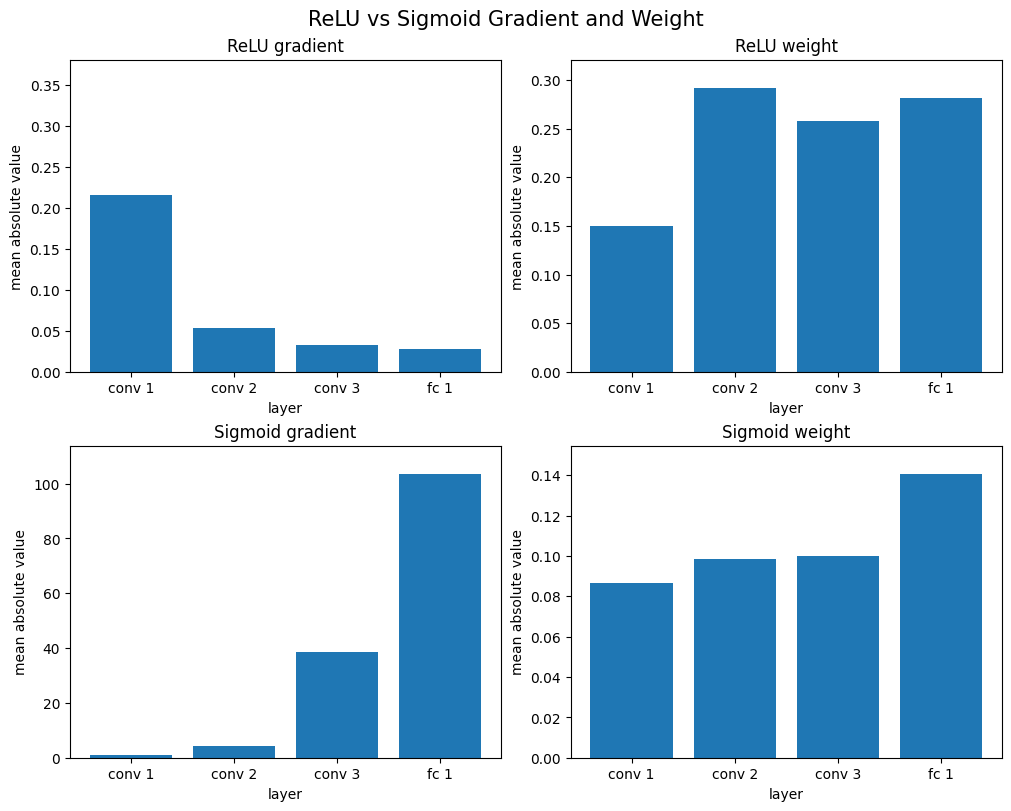

In [484]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='constrained')

relu_ymax_grad = max([i.max().item() for i in relu_mean_grad_history])*1.1
relu_ymax_weight = max([i.max().item() for i in relu_mean_weight_history])*1.1

i = -1

x_axis = [f"conv {i}" for i in range(1,4)]+[f"fc {i}" for i in range(1, 2)]

ax = axs[0][0]
ax.bar(x_axis,relu_mean_grad_history[i].cpu(), width=0.8)
ax.set_ylim([0,relu_ymax_grad])
ax.set_xlabel("layer")
ax.set_ylabel("mean absolute value")
ax.set_title("ReLU gradient")

ax = axs[0][1]
ax.bar(x_axis,relu_mean_weight_history[i].cpu(), width=0.8)
ax.set_ylim([0,relu_ymax_weight])
ax.set_xlabel("layer")
ax.set_ylabel("mean absolute value")
ax.set_title("ReLU weight")

sig_ymax_grad = max([i.max().item() for i in sig_mean_grad_history])*1.1
sig_ymax_weight = max([i.max().item() for i in sig_mean_weight_history])*1.1

ax = axs[1][0]
ax.bar(x_axis,sig_mean_grad_history[i].cpu(), width=0.8)
ax.set_ylim([0, sig_ymax_grad])
ax.set_xlabel("layer")
ax.set_ylabel("mean absolute value")
ax.set_title("Sigmoid gradient")

ax = axs[1][1]
ax.bar(x_axis,sig_mean_weight_history[i].cpu(), width=0.8)
ax.set_ylim([0, sig_ymax_weight])
ax.set_xlabel("layer")
ax.set_ylabel("mean absolute value")
ax.set_title("Sigmoid weight")

fig.suptitle('ReLU vs Sigmoid Gradient and Weight', fontsize=15)
plt.show()

In [485]:
sig_mean_grad_history

[tensor([0.0113, 0.0416, 0.3899, 1.0453]),
 tensor([0.0344, 0.1250, 1.1740, 3.1313]),
 tensor([0.0576, 0.2096, 1.9567, 5.2461]),
 tensor([0.0809, 0.2936, 2.7447, 7.3498]),
 tensor([0.1033, 0.3754, 3.5159, 9.4066]),
 tensor([ 0.1266,  0.4599,  4.2973, 11.5017]),
 tensor([ 0.1492,  0.5433,  5.0653, 13.5687]),
 tensor([ 0.1723,  0.6271,  5.8537, 15.6800]),
 tensor([ 0.1957,  0.7109,  6.6358, 17.7682]),
 tensor([ 0.2186,  0.7947,  7.4219, 19.8809]),
 tensor([ 0.2415,  0.8782,  8.1997, 21.9602]),
 tensor([ 0.2645,  0.9616,  8.9789, 24.0398]),
 tensor([ 0.2874,  1.0454,  9.7561, 26.1167]),
 tensor([ 0.3098,  1.1268, 10.5379, 28.2117]),
 tensor([ 0.3333,  1.2119, 11.3171, 30.3160]),
 tensor([ 0.3563,  1.2964, 12.0953, 32.4033]),
 tensor([ 0.3793,  1.3797, 12.8841, 34.5085]),
 tensor([ 0.4022,  1.4634, 13.6673, 36.6042]),
 tensor([ 0.4252,  1.5462, 14.4410, 38.6774]),
 tensor([ 0.4479,  1.6295, 15.2161, 40.7431]),
 tensor([ 0.4716,  1.7148, 16.0072, 42.8699]),
 tensor([ 0.4942,  1.7985, 16.777

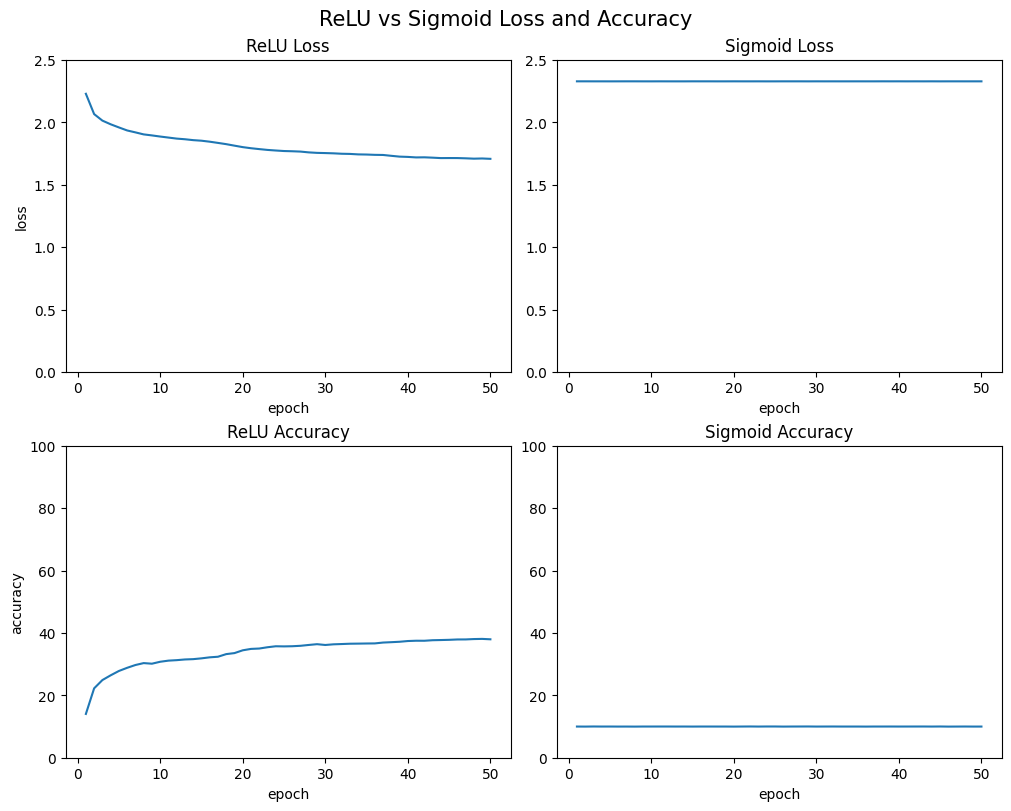

In [486]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='constrained')

xaxis = np.arange(1, EPOCHS+1)

ax = axs[0][0]
ax.plot(xaxis, relu_train_losses)
ax.set_ylim([0,2.5])
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("ReLU Loss")

ax = axs[0][1]
ax.plot(xaxis, sig_train_losses)
ax.set_ylim([0,2.5])
ax.set_xlabel("epoch")
ax.set_title("Sigmoid Loss")

ax = axs[1][0]
ax.plot(xaxis, relu_train_accuracies)
ax.set_ylim([0,100])
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.set_title("ReLU Accuracy")

ax = axs[1][1]
ax.plot(xaxis, sig_train_accuracies)
ax.set_ylim([0,100])
ax.set_xlabel("epoch")
ax.set_title("Sigmoid Accuracy")

fig.suptitle('ReLU vs Sigmoid Loss and Accuracy', fontsize=15)
plt.show()

In [487]:
'''
M11. Model evaluation
'''
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():

    with tqdm_notebook(total=len(test_ds), desc=f"Test_ Epoch {epoch+1}") as pbar:    
        test_losses = []
        test_accuracies = []

        for images, labels in test_ds:
            loss_val, acc = test_step(model, images, labels)

            test_losses.append(loss_val)
            test_accuracies.append(acc)

            pbar.update(1)
            pbar.set_postfix_str(f"Loss: {loss_val:.4f} ({np.mean(test_losses):.4f}) Acc: {acc:.3f} ({np.mean(test_accuracies):.3f})")

/var/folders/bx/kws8rd4525gfj8xnyb4pbjrh0000gn/T/ipykernel_892/2424828649.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  with tqdm_notebook(total=len(test_ds), desc=f"Test_ Epoch {epoch+1}") as pbar:


Test_ Epoch 50:   0%|          | 0/40 [00:00<?, ?it/s]

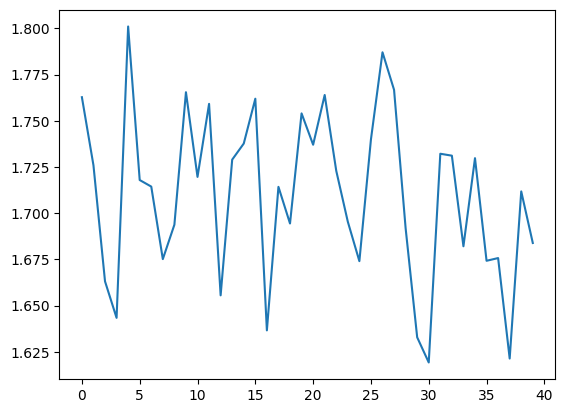

In [488]:
plt.plot(test_losses)